In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


%matplotlib inline

In [19]:
#Load data
names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
       'total sulfur dioxide','density','pH','sulphates','alcohol','quality']
df = pd.read_csv("winequality-red.csv", sep=';',names=names)

In [20]:
#Extract x
X_df = df.iloc[:,:-1]
X = X_df.as_matrix()

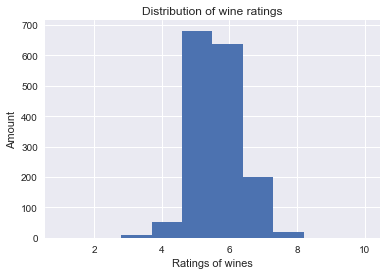

In [21]:
y_df = df['quality'].values
plt.hist(y_df, range=(1, 10))
plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

In [22]:
#make y value binary, threshold=7
Y = np.array([1 if i>=7 else 0 for i in y_df])

In [23]:
#Split set into test and train
X_test=[]
X_train=[]
Y_test=[]
Y_train=[]

X_test=[X[i] for i in range(int(0.2*len(X)))]
X_train=[X[i] for i in range(int(0.2*len(X)),len(X))]
Y_test=[Y[i] for i in range(int(0.2*len(Y)))]
Y_train=[Y[i] for i in range(int(0.2*len(Y)),len(Y))]

In [28]:
loo=LeaveOneOut()
loo.get_n_splits(Y_train)
cv_scores=[]


for num_trees in range(1,21):
    model = RandomForestClassifier(n_estimators = num_trees)
    scores=cross_val_score(model, X_train, Y_train, cv=loo,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

print ("index          Score          MSE")
for i in range(len(cv_scores)):
    print '%d          %.5f          %.5f'% (i, cv_scores[i],MSE[i])
    

index          Score          MSE
1          0.87813          0.12187
2          0.88906          0.11094
3          0.88438          0.11562
4          0.88594          0.11406
5          0.90078          0.09922
6          0.88047          0.11953
7          0.89062          0.10938
8          0.89453          0.10547
9          0.90156          0.09844


IndexError: list index out of range

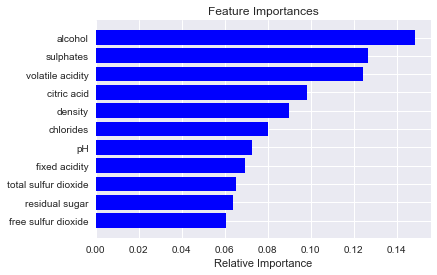

In [33]:
#feature selection
model=RandomForestClassifier(n_estimators=9)
model.fit(X_train,Y_train)

features = df.columns[0:12]
importances = model.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
